In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv("player_stats.csv", encoding="latin1")


In [13]:
df_sorted = df.sort_values("finishing", ascending=False)
print(df_sorted[["player", "finishing"]].head(20))  

                 player  finishing
1965     Erling Haaland         94
5675      Kylian Mbappé         93
5229     Kylian MbappÃ©         93
5677      Mohamed Salah         92
5676      Karim Benzema         92
5680  Cristiano Ronaldo         91
4498         Iago Aspas         90
3555       Lionel Messi         90
329       Gerard Moreno         89
3416  Lautaro MartÃ­nez         88
857       Romelu Lukaku         88
68    Wissam Ben Yedder         87
1603     Jason Bardeira         86
1481      Ãngel Correa         86
916         Sadio ManÃ©         85
3404     Edinson Cavani         85
5632          Oyarzabal         85
4849    Kevin De Bruyne         85
3612    RaÃºl de TomÃ¡s         85
5019     Martin Terrier         85


In [14]:
print(df.columns)


Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')


### Exploratory Data Analysis (EDA)

In [15]:
print(df.describe())  # Shows summary statistics


            height       weight          age  ball_control    dribbling  \
count  5682.000000  5682.000000  5682.000000   5682.000000  5682.000000   
mean    181.670539    75.282295    26.316262     58.912179    56.128476   
std       6.829238     6.998971     4.729967     16.567068    18.772075   
min     156.000000    54.000000    17.000000      8.000000     5.000000   
25%     177.000000    70.000000    23.000000     55.000000    51.000000   
50%     182.000000    75.000000    26.000000     63.000000    62.000000   
75%     186.000000    80.000000    30.000000     69.000000    68.000000   
max     204.000000   102.000000    41.000000     94.000000    95.000000   

       slide_tackle  stand_tackle   aggression    reactions  att_position  \
count   5682.000000   5682.000000  5682.000000  5682.000000   5682.000000   
mean      46.728441     48.820838    56.324006    61.959345     50.724921   
std       20.519430     20.975966    16.846410     8.893309     19.780636   
min        7.000

###  Distribution of Player's Skill
#### You can analyze the distribution of player's skill (in this example we will be using the finishing column).

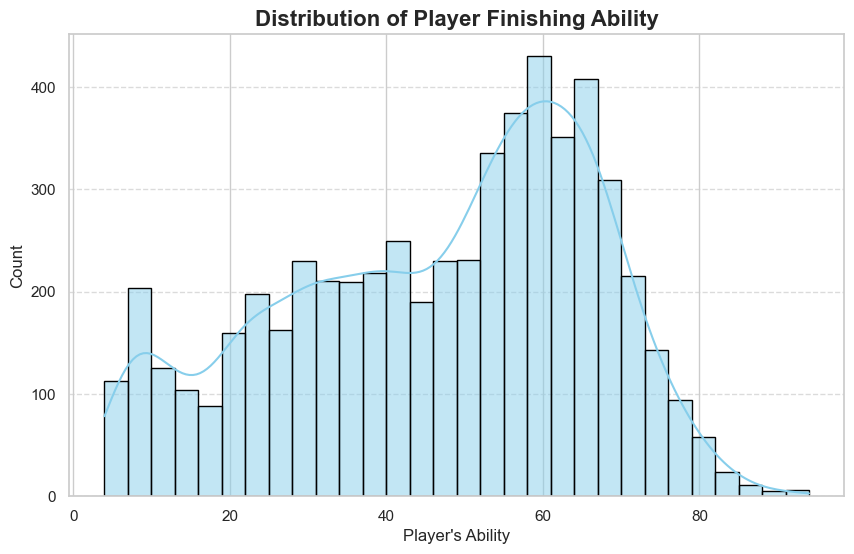

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df["finishing"], bins=30, kde=True, color="skyblue", edgecolor="black")

# Add title and labels
plt.title("Distribution of Player Finishing Ability", fontsize=16, fontweight="bold")
plt.xlabel("Player's Ability", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

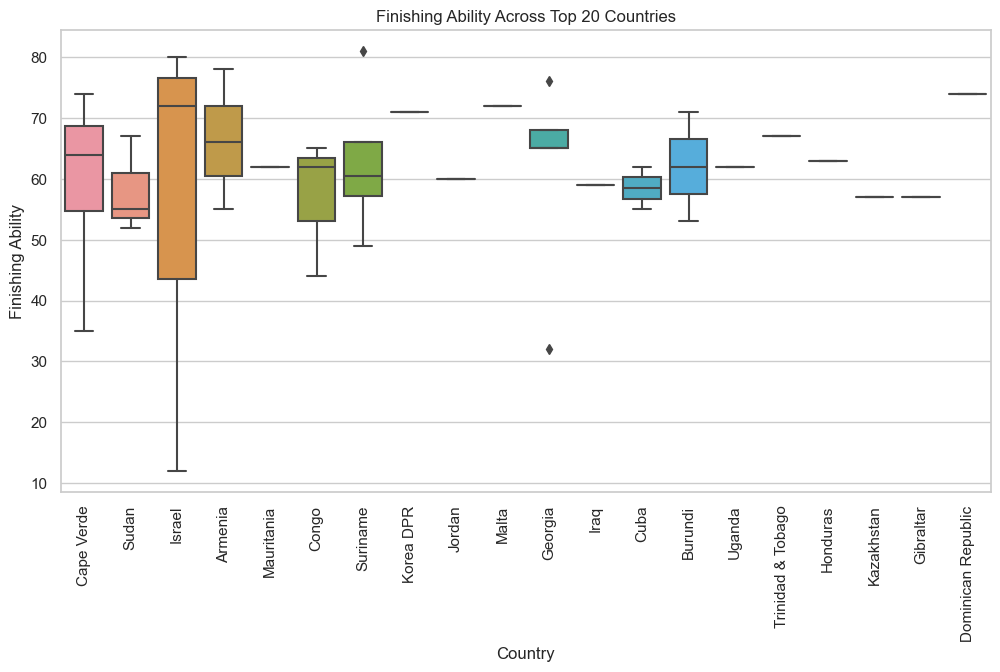

In [26]:
# Calculate the average finishing ability for each country
top_10_countries = df.groupby('country')['finishing'].mean().sort_values(ascending=False).head(20)

# Filter the dataset to only include the top 10 countries
df_top_10_countries = df[df['country'].isin(top_10_countries.index)]

# Plot the boxplot for finishing ability across the top 10 countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='finishing', data=df_top_10_countries)

# Add title and labels
plt.title('Finishing Ability Across Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Finishing Ability')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Finding similar players based on stats

In [36]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Assuming the data is already loaded into 'df'

# Step 1: Preprocess the data
# We select the relevant attributes for comparison
attributes = ['penalties','acceleration', 'dribbling', 'ball_control', 'vision', 'finishing', 'short_pass', 'strength','stamina','long_shots']

# Remove rows with missing values in any of the selected attributes
df_cleaned = df.dropna(subset=attributes)

# Step 2: Normalize the attributes to ensure each feature has the same scale
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[attributes]), columns=attributes)

# Step 3: Define the function to find similar players based on cosine similarity
def find_similar_players(player_name, top_n=5):
    # Get the player's data
    player_data = df_scaled[df_cleaned['player'] == player_name]

    if player_data.empty:
        return f"Player '{player_name}' not found in the dataset."

    # Compute cosine similarity between the target player and all other players
    similarity_scores = cosine_similarity(player_data, df_scaled)

    # Get the indices of the most similar players
    similarity_scores = similarity_scores.flatten()
    similar_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]  # Exclude the player themselves

    # Get the names of the most similar players
    similar_players = df_cleaned.iloc[similar_indices][['player', 'country', 'club']]
    similar_players['similarity'] = similarity_scores[similar_indices]
    
    return similar_players

# Example
similar_players = find_similar_players('Erling Haaland')
print(similar_players)


                player  country             club  similarity
3242       Andy Delort  Algeria       FC Nantes     0.991070
1935          Rafa Mir    Spain      Sevilla FC     0.987690
2266  Benedikt Pichler  Austria   Holstein Kiel     0.985041
1614         Evanilson   Brazil        FC Porto     0.984963
1678  Thorsten RÃ¶cher  Austria  Wolfsberger AC     0.982316


## Comparing the attributes of the selected player with the most similar player

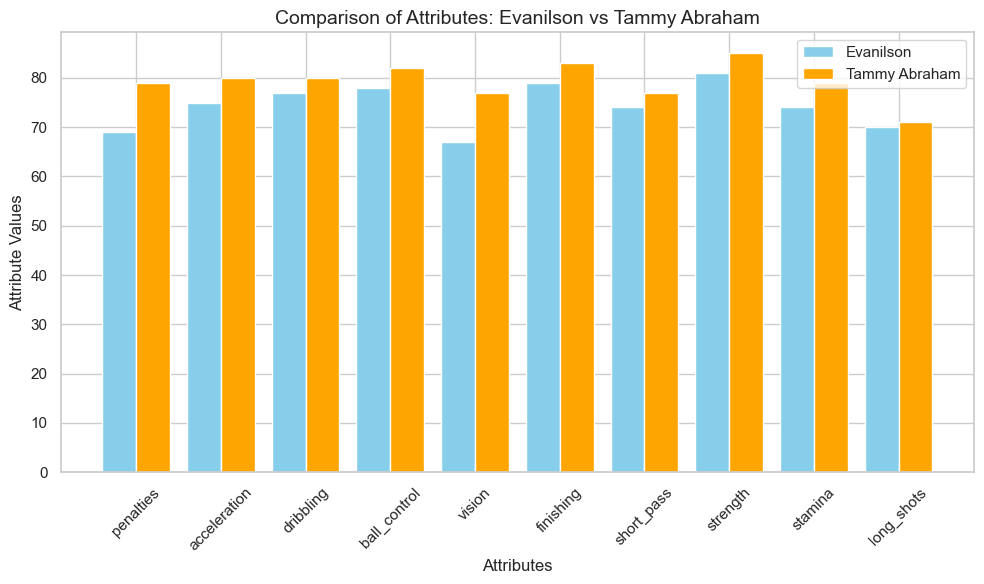

      Attribute Evanilson  Tammy Abraham Difference
0     penalties        69             79        -10
1  acceleration        75             80         -5
2     dribbling        77             80         -3
3  ball_control        78             82         -4
4        vision        67             77        -10
5     finishing        79             83         -4
6    short_pass        74             77         -3
7      strength        81             85         -4
8       stamina        74             79         -5
9    long_shots        70             71         -1


In [43]:
def compare_player_with_top_similar(player_name, top_n=1):
    # Step 1: Find the most similar players
    similar_players = find_similar_players(player_name, top_n=top_n)

    if similar_players.empty:
        return f"Player '{player_name}' not found in the dataset."

    # Step 2: Get the selected player data
    selected_player = df_cleaned[df_cleaned['player'] == player_name].iloc[0]
    
    # Step 3: Get the most similar player data
    most_similar_player = similar_players.iloc[0]
    
    # Step 4: Compare selected attributes
    selected_player_attrs = selected_player[attributes].values
    most_similar_player_attrs = df_cleaned[df_cleaned['player'] == most_similar_player['player']][attributes].values.flatten()
    
    # Calculate differences in attributes
    attribute_differences = selected_player_attrs - most_similar_player_attrs

    # Step 5: Plot the comparison
    attribute_names = attributes  # Names of the attributes
    x = np.arange(len(attribute_names))  # X-axis positions
    
    plt.figure(figsize=(10, 6))

    # Plot bars for the selected player and the most similar player
    plt.bar(x - 0.2, selected_player_attrs, width=0.4, label=player_name, align='center', color='skyblue')
    plt.bar(x + 0.2, most_similar_player_attrs, width=0.4, label=most_similar_player['player'], align='center', color='orange')
    
    # Label the plot
    plt.xlabel('Attributes', fontsize=12)
    plt.ylabel('Attribute Values', fontsize=12)
    plt.title(f'Comparison of Attributes: {player_name} vs {most_similar_player["player"]}', fontsize=14)
    plt.xticks(x, attribute_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Step 6: Return the comparison in a tabular form
    comparison_table = pd.DataFrame({
        'Attribute': attribute_names,
        player_name: selected_player_attrs,
        most_similar_player['player']: most_similar_player_attrs,
        'Difference': attribute_differences
    })
    
    return comparison_table

# Example usage:
# 
comparison_result = compare_player_with_top_similar('Evanilson')
print(comparison_result)


NameError: name 'find_similar_players' is not defined